# Sprint17

# 1.アノテーション前処理

In [1]:
# アノテーションファイルの読込み

import pandas as pd
import numpy as np

data = pd.read_csv('/home/hiro/デスクトップ/annotation.txt',header=None)
data

,0,1,2,3,4,5
0,./characters/abraham_grampa_simpson/pic_0000.jpg,57,72,52,72,abraham_grampa_simpson
1,./characters/abraham_grampa_simpson/pic_0001.jpg,80,31,337,354,abraham_grampa_simpson
2,./characters/abraham_grampa_simpson/pic_0002.jpg,128,48,285,407,abraham_grampa_simpson
3,./characters/abraham_grampa_simpson/pic_0003.jpg,72,126,158,275,abraham_grampa_simpson
4,./characters/abraham_grampa_simpson/pic_0004.jpg,123,61,294,416,abraham_grampa_simpson
5,./characters/abraham_grampa_simpson/pic_0005.jpg,115,18,498,413,abraham_grampa_simpson
6,./characters/abraham_grampa_simpson/pic_0006.jpg,171,47,423,413,abraham_grampa_simpson
7,./characters/abraham_grampa_simpson/pic_0007.jpg,120,53,381,409,abraham_grampa_simpson
8,./characters/abraham_grampa_simpson/pic_0008.jpg,149,56,398,406,abraham_grampa_simpson
9,./characters/abraham_grampa_simpson/pic_0009.jpg,205,41,470,456,abraham_grampa_simpson


## ラベルリング用のクラスファイル生成

In [2]:
# 各キャラクターを取得
unique_name = data[5].unique()
unique_name

array(['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson',
       'charles_montgomery_burns', 'chief_wiggum', 'comic_book_guy',
       'edna_krabappel', 'homer_simpson', 'kent_brockman',
       'krusty_the_clown', 'lisa_simpson', 'marge_simpson',
       'milhouse_van_houten', 'moe_szyslak', 'ned_flanders',
       'nelson_muntz', 'principal_skinner', 'sideshow_bob'], dtype=object)

In [3]:
f = open('class.txt', 'w')

for line in unique_name[:,np.newaxis]:
    temp = list(line)
    temp = ','.join(temp)
    print(temp)
    f.write(temp + "\n")

abraham_grampa_simpson
apu_nahasapeemapetilon
bart_simpson
charles_montgomery_burns
chief_wiggum
comic_book_guy
edna_krabappel
homer_simpson
kent_brockman
krusty_the_clown
lisa_simpson
marge_simpson
milhouse_van_houten
moe_szyslak
ned_flanders
nelson_muntz
principal_skinner
sideshow_bob


## クラスラベルを数字にエンコード

In [4]:
# 変換用の辞書を生成
adict = {}

for i,name in enumerate(unique_name):
    adict[name] = i

adict

{'abraham_grampa_simpson': 0,
 'apu_nahasapeemapetilon': 1,
 'bart_simpson': 2,
 'charles_montgomery_burns': 3,
 'chief_wiggum': 4,
 'comic_book_guy': 5,
 'edna_krabappel': 6,
 'homer_simpson': 7,
 'kent_brockman': 8,
 'krusty_the_clown': 9,
 'lisa_simpson': 10,
 'marge_simpson': 11,
 'milhouse_van_houten': 12,
 'moe_szyslak': 13,
 'ned_flanders': 14,
 'nelson_muntz': 15,
 'principal_skinner': 16,
 'sideshow_bob': 17}

In [5]:
# 各キャラクター名を数字に変換
data[5] = data[5].map(adict)
data

,0,1,2,3,4,5
0,./characters/abraham_grampa_simpson/pic_0000.jpg,57,72,52,72,0
1,./characters/abraham_grampa_simpson/pic_0001.jpg,80,31,337,354,0
2,./characters/abraham_grampa_simpson/pic_0002.jpg,128,48,285,407,0
3,./characters/abraham_grampa_simpson/pic_0003.jpg,72,126,158,275,0
4,./characters/abraham_grampa_simpson/pic_0004.jpg,123,61,294,416,0
5,./characters/abraham_grampa_simpson/pic_0005.jpg,115,18,498,413,0
6,./characters/abraham_grampa_simpson/pic_0006.jpg,171,47,423,413,0
7,./characters/abraham_grampa_simpson/pic_0007.jpg,120,53,381,409,0
8,./characters/abraham_grampa_simpson/pic_0008.jpg,149,56,398,406,0
9,./characters/abraham_grampa_simpson/pic_0009.jpg,205,41,470,456,0


## 変換したデータをテキストファイルに出力

In [6]:
# C++風処理

list_data = data.values.tolist()

f = open('list.txt', 'w')

for line in list_data:
    temp = ""
    for i, string in enumerate(line):
        if i == 0:
            temp += str(string) + " "
        elif i == len(line) -1:
            temp += str(string)
        else:
            temp += str(string) + ","
    print(temp)
    f.write(temp + "\n")

./characters/abraham_grampa_simpson/pic_0000.jpg 57,72,52,72,0
./characters/abraham_grampa_simpson/pic_0001.jpg 80,31,337,354,0
./characters/abraham_grampa_simpson/pic_0002.jpg 128,48,285,407,0
./characters/abraham_grampa_simpson/pic_0003.jpg 72,126,158,275,0
./characters/abraham_grampa_simpson/pic_0004.jpg 123,61,294,416,0
./characters/abraham_grampa_simpson/pic_0005.jpg 115,18,498,413,0
./characters/abraham_grampa_simpson/pic_0006.jpg 171,47,423,413,0
./characters/abraham_grampa_simpson/pic_0007.jpg 120,53,381,409,0
./characters/abraham_grampa_simpson/pic_0008.jpg 149,56,398,406,0
./characters/abraham_grampa_simpson/pic_0009.jpg 205,41,470,456,0
./characters/abraham_grampa_simpson/pic_0010.jpg 71,29,265,424,0
./characters/abraham_grampa_simpson/pic_0011.jpg 2,24,176,408,0
./characters/abraham_grampa_simpson/pic_0012.jpg 132,166,240,346,0
./characters/abraham_grampa_simpson/pic_0013.jpg 61,38,418,404,0
./characters/abraham_grampa_simpson/pic_0014.jpg 144,46,467,474,0
./characters/abra

./characters/charles_montgomery_burns/pic_0464.jpg 136,23,316,300,3
./characters/charles_montgomery_burns/pic_0465.jpg 147,6,334,292,3
./characters/charles_montgomery_burns/pic_0470.jpg 2,1,575,414,3
./characters/charles_montgomery_burns/pic_0475.jpg 2,77,82,283,3
./characters/charles_montgomery_burns/pic_0479.jpg 35,27,360,328,3
./characters/charles_montgomery_burns/pic_0482.jpg 2,33,134,295,3
./characters/charles_montgomery_burns/pic_0485.jpg 143,74,405,306,3
./characters/charles_montgomery_burns/pic_0486.jpg 83,46,179,222,3
./characters/charles_montgomery_burns/pic_0487.jpg 251,7,478,299,3
./characters/charles_montgomery_burns/pic_0489.jpg 1,40,190,310,3
./characters/charles_montgomery_burns/pic_0492.jpg 13,6,234,267,3
./characters/charles_montgomery_burns/pic_0496.jpg 87,10,244,254,3
./characters/charles_montgomery_burns/pic_0497.jpg 98,14,283,253,3
./characters/charles_montgomery_burns/pic_0498.jpg 31,17,182,265,3
./characters/charles_montgomery_burns/pic_0499.jpg 85,105,285,349,3

./characters/comic_book_guy/pic_0204.jpg 113,104,295,345,5
./characters/comic_book_guy/pic_0205.jpg 229,15,517,312,5
./characters/comic_book_guy/pic_0219.jpg 148,43,293,227,5
./characters/comic_book_guy/pic_0223.jpg 207,11,466,322,5
./characters/comic_book_guy/pic_0224.jpg 127,10,477,341,5
./characters/comic_book_guy/pic_0226.jpg 119,31,307,339,5
./characters/comic_book_guy/pic_0236.jpg 98,23,400,341,5
./characters/comic_book_guy/pic_0247.jpg 44,99,219,214,5
./characters/comic_book_guy/pic_0248.jpg 165,49,315,274,5
./characters/comic_book_guy/pic_0264.jpg 272,15,523,287,5
./characters/comic_book_guy/pic_0266.jpg 364,93,703,609,5
./characters/comic_book_guy/pic_0274.jpg 161,23,462,327,5
./characters/comic_book_guy/pic_0279.jpg 88,82,259,294,5
./characters/comic_book_guy/pic_0283.jpg 2,31,196,413,5
./characters/comic_book_guy/pic_0284.jpg 109,31,367,407,5
./characters/comic_book_guy/pic_0285.jpg 280,10,851,519,5
./characters/comic_book_guy/pic_0288.jpg 121,4,360,366,5
./characters/comic_

./characters/lisa_simpson/pic_0986.jpg 115,19,441,381,10
./characters/lisa_simpson/pic_0987.jpg 37,154,243,457,10
./characters/lisa_simpson/pic_0988.jpg 67,123,236,366,10
./characters/lisa_simpson/pic_0992.jpg 91,88,269,283,10
./characters/lisa_simpson/pic_1003.jpg 69,119,237,377,10
./characters/lisa_simpson/pic_1007.jpg 261,41,466,337,10
./characters/lisa_simpson/pic_1011.jpg 150,10,483,322,10
./characters/lisa_simpson/pic_1014.jpg 49,4,404,392,10
./characters/lisa_simpson/pic_1019.jpg 262,3,495,294,10
./characters/lisa_simpson/pic_1022.jpg 34,129,169,359,10
./characters/lisa_simpson/pic_1025.jpg 174,6,472,359,10
./characters/lisa_simpson/pic_1027.jpg 283,24,507,353,10
./characters/lisa_simpson/pic_1031.jpg 100,81,451,363,10
./characters/lisa_simpson/pic_1032.jpg 176,19,446,457,10
./characters/lisa_simpson/pic_1034.jpg 42,228,225,428,10
./characters/lisa_simpson/pic_1035.jpg 206,59,424,336,10
./characters/lisa_simpson/pic_1037.jpg 184,6,305,170,10
./characters/lisa_simpson/pic_1038.jp

./characters/marge_simpson/pic_0814.jpg 46,131,204,368,11
./characters/marge_simpson/pic_0818.jpg 30,0,225,366,11
./characters/marge_simpson/pic_0819.jpg 1,3,260,470,11
./characters/marge_simpson/pic_0820.jpg 65,5,248,365,11
./characters/marge_simpson/pic_0821.jpg 26,4,283,370,11
./characters/marge_simpson/pic_0823.jpg 49,4,279,382,11
./characters/marge_simpson/pic_0824.jpg 102,3,294,416,11
./characters/marge_simpson/pic_0825.jpg 93,15,289,337,11
./characters/marge_simpson/pic_0827.jpg 79,4,275,373,11
./characters/marge_simpson/pic_0829.jpg 3,3,194,329,11
./characters/marge_simpson/pic_0831.jpg 34,24,249,477,11
./characters/marge_simpson/pic_0832.jpg 53,7,237,329,11
./characters/marge_simpson/pic_0833.jpg 41,9,310,468,11
./characters/marge_simpson/pic_0834.jpg 59,3,280,340,11
./characters/marge_simpson/pic_0835.jpg 76,5,269,281,11
./characters/marge_simpson/pic_0840.jpg 34,5,215,316,11
./characters/marge_simpson/pic_0841.jpg 175,5,432,317,11
./characters/marge_simpson/pic_0845.jpg 92,6

./characters/principal_skinner/pic_0178.jpg 0,1,155,205,16
./characters/principal_skinner/pic_0304.jpg 58,17,160,160,16
./characters/principal_skinner/pic_0527.jpg 4,22,139,215,16
./characters/principal_skinner/pic_0311.jpg 187,35,342,280,16
./characters/principal_skinner/pic_0500.jpg 269,147,377,296,16
./characters/principal_skinner/pic_0976.jpg 278,6,438,219,16
./characters/principal_skinner/pic_0192.jpg 240,8,357,199,16
./characters/principal_skinner/pic_0434.jpg 81,67,168,198,16
./characters/principal_skinner/pic_0041.jpg 53,26,106,120,16
./characters/principal_skinner/pic_0449.jpg 78,24,199,208,16
./characters/principal_skinner/pic_0069.jpg 62,1,114,74,16
./characters/principal_skinner/pic_0051.jpg 77,1,161,118,16
./characters/principal_skinner/pic_0410.jpg 72,25,181,187,16
./characters/principal_skinner/pic_0980.jpg 222,23,432,341,16
./characters/principal_skinner/pic_0656.jpg 115,5,325,272,16
./characters/principal_skinner/pic_0529.jpg 0,50,111,245,16
./characters/principal_skin

./characters/comic_book_guy/pic_0249.jpg 74,30,281,289,5
./characters/comic_book_guy/pic_0413.jpg 129,60,347,323,5
./characters/comic_book_guy/pic_0094.jpg 73,5,265,165,5
./characters/comic_book_guy/pic_0368.jpg 5,78,411,496,5
./characters/comic_book_guy/pic_0299.jpg 465,14,787,363,5
./characters/comic_book_guy/pic_0422.jpg 74,175,155,271,5
./characters/comic_book_guy/pic_0441.jpg 253,58,413,228,5
./characters/comic_book_guy/pic_0061.jpg 65,7,119,82,5
./characters/comic_book_guy/pic_0216.jpg 125,30,242,174,5
./characters/comic_book_guy/pic_0438.jpg 155,43,455,302,5
./characters/comic_book_guy/pic_0256.jpg 451,142,863,635,5
./characters/comic_book_guy/pic_0112.jpg 195,15,418,254,5
./characters/comic_book_guy/pic_0267.jpg 189,52,330,205,5
./characters/comic_book_guy/pic_0142.jpg 143,15,286,227,5
./characters/comic_book_guy/pic_0164.jpg 259,14,454,246,5
./characters/comic_book_guy/pic_0151.jpg 17,3,250,223,5
./characters/comic_book_guy/pic_0066.jpg 30,26,89,99,5
./characters/comic_book_gu

In [7]:
# python版処理

f = open('list.txt', 'w')

list_data = data.values.tolist()

for line in list_data:
    temp = map(str, line)
    temp = ','.join(temp)
    temp = temp.replace(".jpg,", ".jpg ")
    print(temp)
    f.write(temp + "\n")

./characters/abraham_grampa_simpson/pic_0000.jpg 57,72,52,72,0
./characters/abraham_grampa_simpson/pic_0001.jpg 80,31,337,354,0
./characters/abraham_grampa_simpson/pic_0002.jpg 128,48,285,407,0
./characters/abraham_grampa_simpson/pic_0003.jpg 72,126,158,275,0
./characters/abraham_grampa_simpson/pic_0004.jpg 123,61,294,416,0
./characters/abraham_grampa_simpson/pic_0005.jpg 115,18,498,413,0
./characters/abraham_grampa_simpson/pic_0006.jpg 171,47,423,413,0
./characters/abraham_grampa_simpson/pic_0007.jpg 120,53,381,409,0
./characters/abraham_grampa_simpson/pic_0008.jpg 149,56,398,406,0
./characters/abraham_grampa_simpson/pic_0009.jpg 205,41,470,456,0
./characters/abraham_grampa_simpson/pic_0010.jpg 71,29,265,424,0
./characters/abraham_grampa_simpson/pic_0011.jpg 2,24,176,408,0
./characters/abraham_grampa_simpson/pic_0012.jpg 132,166,240,346,0
./characters/abraham_grampa_simpson/pic_0013.jpg 61,38,418,404,0
./characters/abraham_grampa_simpson/pic_0014.jpg 144,46,467,474,0
./characters/abra

./characters/bart_simpson/pic_0885.jpg 9,51,166,424,2
./characters/bart_simpson/pic_0889.jpg 235,9,491,327,2
./characters/bart_simpson/pic_0890.jpg 190,28,439,390,2
./characters/bart_simpson/pic_0891.jpg 88,201,226,400,2
./characters/bart_simpson/pic_0893.jpg 104,115,257,375,2
./characters/bart_simpson/pic_0894.jpg 113,11,414,338,2
./characters/bart_simpson/pic_0896.jpg 155,79,488,363,2
./characters/bart_simpson/pic_0897.jpg 213,14,416,353,2
./characters/bart_simpson/pic_0898.jpg 134,121,274,389,2
./characters/bart_simpson/pic_0900.jpg 33,133,276,425,2
./characters/bart_simpson/pic_0905.jpg 42,151,230,393,2
./characters/bart_simpson/pic_0906.jpg 20,30,258,404,2
./characters/bart_simpson/pic_0909.jpg 214,36,330,403,2
./characters/bart_simpson/pic_0911.jpg 52,54,204,309,2
./characters/bart_simpson/pic_0912.jpg 71,145,220,317,2
./characters/bart_simpson/pic_0914.jpg 67,68,235,302,2
./characters/bart_simpson/pic_0918.jpg 209,2,441,385,2
./characters/bart_simpson/pic_0919.jpg 114,15,394,332

./characters/charles_montgomery_burns/pic_0789.jpg 98,61,282,336,3
./characters/charles_montgomery_burns/pic_0790.jpg 138,5,477,392,3
./characters/charles_montgomery_burns/pic_0793.jpg 37,129,155,379,3
./characters/charles_montgomery_burns/pic_0796.jpg 195,8,665,441,3
./characters/charles_montgomery_burns/pic_0797.jpg 52,7,305,330,3
./characters/charles_montgomery_burns/pic_0798.jpg 35,108,288,407,3
./characters/charles_montgomery_burns/pic_0799.jpg 204,51,477,318,3
./characters/charles_montgomery_burns/pic_0800.jpg 156,25,478,337,3
./characters/charles_montgomery_burns/pic_0801.jpg 100,29,366,330,3
./characters/charles_montgomery_burns/pic_0802.jpg 190,25,491,266,3
./characters/charles_montgomery_burns/pic_0803.jpg 248,24,554,279,3
./characters/charles_montgomery_burns/pic_0808.jpg 182,14,304,217,3
./characters/charles_montgomery_burns/pic_0811.jpg 118,51,302,295,3
./characters/charles_montgomery_burns/pic_0812.jpg 58,57,254,320,3
./characters/charles_montgomery_burns/pic_0815.jpg 49,

./characters/homer_simpson/pic_0356.jpg 25,106,197,415,7
./characters/homer_simpson/pic_0357.jpg 208,39,492,318,7
./characters/homer_simpson/pic_0371.jpg 218,17,430,316,7
./characters/homer_simpson/pic_0376.jpg 218,22,397,227,7
./characters/homer_simpson/pic_0378.jpg 164,13,279,174,7
./characters/homer_simpson/pic_0387.jpg 245,67,310,317,7
./characters/homer_simpson/pic_0388.jpg 10,47,241,341,7
./characters/homer_simpson/pic_0392.jpg 140,15,367,429,7
./characters/homer_simpson/pic_0393.jpg 201,119,280,292,7
./characters/homer_simpson/pic_0394.jpg 232,25,433,411,7
./characters/homer_simpson/pic_0402.jpg 253,120,440,432,7
./characters/homer_simpson/pic_0403.jpg 281,45,402,232,7
./characters/homer_simpson/pic_0404.jpg 145,89,254,187,7
./characters/homer_simpson/pic_0408.jpg 189,45,466,385,7
./characters/homer_simpson/pic_0412.jpg 97,30,239,334,7
./characters/homer_simpson/pic_0415.jpg 167,11,420,423,7
./characters/homer_simpson/pic_0422.jpg 85,19,253,316,7
./characters/homer_simpson/pic_0

./characters/lisa_simpson/pic_0353.jpg 121,47,365,316,10
./characters/lisa_simpson/pic_0356.jpg 74,49,351,377,10
./characters/lisa_simpson/pic_0361.jpg 156,12,474,403,10
./characters/lisa_simpson/pic_0363.jpg 120,255,202,390,10
./characters/lisa_simpson/pic_0364.jpg 198,17,369,256,10
./characters/lisa_simpson/pic_0368.jpg 115,259,245,440,10
./characters/lisa_simpson/pic_0374.jpg 137,15,390,332,10
./characters/lisa_simpson/pic_0377.jpg 104,213,202,381,10
./characters/lisa_simpson/pic_0384.jpg 224,30,376,266,10
./characters/lisa_simpson/pic_0386.jpg 49,38,295,350,10
./characters/lisa_simpson/pic_0387.jpg 207,35,448,384,10
./characters/lisa_simpson/pic_0389.jpg 141,225,260,401,10
./characters/lisa_simpson/pic_0393.jpg 54,2,367,357,10
./characters/lisa_simpson/pic_0397.jpg 93,73,421,389,10
./characters/lisa_simpson/pic_0398.jpg 129,211,285,379,10
./characters/lisa_simpson/pic_0399.jpg 2,48,160,223,10
./characters/lisa_simpson/pic_0400.jpg 322,176,446,342,10
./characters/lisa_simpson/pic_04

./characters/marge_simpson/pic_0203.jpg 194,14,401,189,11
./characters/marge_simpson/pic_0205.jpg 81,4,236,282,11
./characters/marge_simpson/pic_0206.jpg 96,7,268,340,11
./characters/marge_simpson/pic_0207.jpg 191,6,403,314,11
./characters/marge_simpson/pic_0210.jpg 32,24,198,372,11
./characters/marge_simpson/pic_0212.jpg 219,5,420,311,11
./characters/marge_simpson/pic_0213.jpg 55,5,286,399,11
./characters/marge_simpson/pic_0214.jpg 4,7,251,348,11
./characters/marge_simpson/pic_0215.jpg 113,39,242,317,11
./characters/marge_simpson/pic_0217.jpg 230,3,385,252,11
./characters/marge_simpson/pic_0218.jpg 95,68,316,333,11
./characters/marge_simpson/pic_0219.jpg 149,4,433,393,11
./characters/marge_simpson/pic_0220.jpg 134,2,454,409,11
./characters/marge_simpson/pic_0221.jpg 82,5,222,256,11
./characters/marge_simpson/pic_0225.jpg 23,5,319,266,11
./characters/marge_simpson/pic_0226.jpg 50,5,167,221,11
./characters/marge_simpson/pic_0230.jpg 0,3,227,463,11
./characters/marge_simpson/pic_0234.jpg

./characters/ned_flanders/pic_0568.jpg 5,23,198,409,14
./characters/ned_flanders/pic_0570.jpg 191,33,420,371,14
./characters/ned_flanders/pic_0571.jpg 156,45,281,423,14
./characters/ned_flanders/pic_0574.jpg 279,68,409,392,14
./characters/ned_flanders/pic_0576.jpg 128,79,252,210,14
./characters/ned_flanders/pic_0579.jpg 150,43,302,377,14
./characters/ned_flanders/pic_0583.jpg 92,5,511,459,14
./characters/ned_flanders/pic_0584.jpg 3,51,199,396,14
./characters/ned_flanders/pic_0586.jpg 173,43,431,256,14
./characters/ned_flanders/pic_0587.jpg 254,29,483,376,14
./characters/ned_flanders/pic_0588.jpg 185,19,337,232,14
./characters/ned_flanders/pic_0593.jpg 181,54,470,415,14
./characters/ned_flanders/pic_0605.jpg 188,29,516,425,14
./characters/ned_flanders/pic_0607.jpg 192,3,475,381,14
./characters/ned_flanders/pic_0608.jpg 215,51,427,410,14
./characters/ned_flanders/pic_0610.jpg 284,14,513,429,14
./characters/ned_flanders/pic_0611.jpg 219,14,350,233,14
./characters/ned_flanders/pic_0612.jpg

./characters/principal_skinner/pic_0378.jpg 98,22,270,268,16
./characters/principal_skinner/pic_0217.jpg 98,2,363,295,16
./characters/principal_skinner/pic_0836.jpg 53,66,215,262,16
./characters/principal_skinner/pic_0650.jpg 1,5,181,288,16
./characters/principal_skinner/pic_0198.jpg 47,34,198,257,16
./characters/principal_skinner/pic_0136.jpg 235,10,419,228,16
./characters/principal_skinner/pic_0075.jpg 3,1,121,104,16
./characters/charles_montgomery_burns/pic_0405.jpg 15,6,172,180,3
./characters/charles_montgomery_burns/pic_0338.jpg 84,31,271,267,3
./characters/charles_montgomery_burns/pic_0419.jpg 148,7,367,262,3
./characters/charles_montgomery_burns/pic_0860.jpg 41,59,225,257,3
./characters/charles_montgomery_burns/pic_0200.jpg 34,49,86,107,3
./characters/charles_montgomery_burns/pic_0442.jpg 3,93,184,281,3
./characters/charles_montgomery_burns/pic_0566.jpg 258,78,340,178,3
./characters/charles_montgomery_burns/pic_0368.jpg 89,57,268,278,3
./characters/charles_montgomery_burns/pic_0

./characters/comic_book_guy/pic_0456.jpg 164,75,310,292,5
./characters/comic_book_guy/pic_0411.jpg 147,32,275,232,5
./characters/comic_book_guy/pic_0090.jpg 115,1,405,352,5
./characters/comic_book_guy/pic_0278.jpg 413,4,745,376,5
./characters/comic_book_guy/pic_0031.jpg 49,11,120,86,5
./characters/comic_book_guy/pic_0123.jpg 142,10,571,450,5
./characters/comic_book_guy/pic_0241.jpg 193,17,393,239,5
./characters/comic_book_guy/pic_0435.jpg 128,18,447,343,5
./characters/comic_book_guy/pic_0006.jpg 38,2,105,66,5
./characters/comic_book_guy/pic_0134.jpg 35,72,168,212,5
./characters/comic_book_guy/pic_0309.jpg 231,6,448,224,5
./characters/comic_book_guy/pic_0249.jpg 74,30,281,289,5
./characters/comic_book_guy/pic_0413.jpg 129,60,347,323,5
./characters/comic_book_guy/pic_0094.jpg 73,5,265,165,5
./characters/comic_book_guy/pic_0368.jpg 5,78,411,496,5
./characters/comic_book_guy/pic_0299.jpg 465,14,787,363,5
./characters/comic_book_guy/pic_0422.jpg 74,175,155,271,5
./characters/comic_book_guy/

./characters/sideshow_bob/pic_0514.jpg 368,1,637,383,17
./characters/sideshow_bob/pic_0320.jpg 1,2,273,327,17
./characters/sideshow_bob/pic_0541.jpg 164,7,561,351,17
./characters/sideshow_bob/pic_0367.jpg 1,2,149,222,17
./characters/sideshow_bob/pic_0095.jpg 34,1,122,123,17
./characters/sideshow_bob/pic_0256.jpg 198,5,431,279,17
./characters/sideshow_bob/pic_0826.jpg 84,5,277,293,17
./characters/sideshow_bob/pic_0331.jpg 2,2,246,362,17
./characters/sideshow_bob/pic_0398.jpg 283,116,490,340,17
./characters/sideshow_bob/pic_0612.jpg 217,2,482,345,17
./characters/sideshow_bob/pic_0107.jpg 9,1,110,141,17
./characters/sideshow_bob/pic_0759.jpg 266,119,409,346,17
./characters/sideshow_bob/pic_0692.jpg 72,31,361,431,17
./characters/sideshow_bob/pic_0136.jpg 0,0,81,97,17
./characters/sideshow_bob/pic_0152.jpg 39,1,261,317,17
./characters/sideshow_bob/pic_0551.jpg 189,117,375,310,17
./characters/sideshow_bob/pic_0649.jpg 111,3,538,365,17
./characters/sideshow_bob/pic_0700.jpg 130,14,273,215,17


# 2. ソース変更箇所
1. yolo_video.py を以下の用に修正し、テストデータを自動で読込み、結果自動で保存するように変更した。
2. train.py を自分で作成したアノテーション、クラスラベルを読込む用に変更した。

Predict する際には、yolo_video.py を以下の用に修正する。

```python
def detect_img(yolo):
    # 実行データ自動読込み対応
    filepath = input('Input image filepath:')
    for idx, img_name in enumerate(sorted(os.listdir(filepath))):
        if not img_name.lower().endswith(('.bmp', '.jpeg', '.jpg', '.png', '.tif', '.tiff')):
            continue
        imagepath = os.path.join(filepath,img_name)
        try:
            image = Image.open(imagepath)
        except:
            print(imagepath)
            print('Open Error! Try again!')
            continue
        else:
            r_image = yolo.detect_image(image)
            #r_image.show()
            # 実行結果を読み込んだファイル名で保存
            r_image.save('results_test/result_{}'.format(img_name.replace('.png', '')))
            print("testtest")
    yolo.close_session()

FLAGS = None
```

学習する際には、train.py の以下の部分を修正する。
```python
def _main():
    annotation_path = 'annotation.txt' # 自分で作成したアノテーションパス
    log_dir = 'logs/000/'
    classes_path = 'model_data/table_data.txt' # 自分で作成したクラスラベルパス
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)
```

一度学習した重みで再度学習する際には、train.py の以下を修正する。
```python
def _main():
    annotation_path = 'annotation.txt'
    log_dir = 'logs/000/'
    classes_path = 'model_data/table_data.txt'
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
    else:
        model = create_model(input_shape, anchors, num_classes,
            # weights_path を学習した重み変更する
            freeze_body=2, weights_path='model_data/trained_weights_stage_1.h5') # make sure you know what you freeze
```

# 3. 学習結果
AWS で学習させ、実行させたが上手く行かなかった。なので、Quick Start での結果を示す。

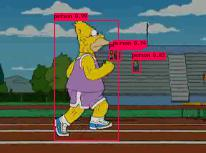

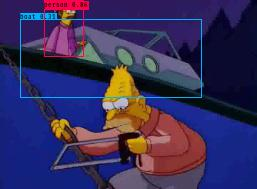

In [10]:
from IPython.display import Image, display_jpeg
# png_file: str
display_jpeg(Image("./simpthons_best/result_abraham_grampa_simpson_1.jpg"))
display_jpeg(Image("./simpthons_best/result_abraham_grampa_simpson_16.jpg"))

# 4. コードリーディング

model.py に今回のネットワーク、darknet の設計が定義してある。<br>
この darknet は「CNN」の部分を担っており、その結果を使用して、検出、クラス分類を行っている。<br>
また、train.py からは keras用に構築された model(計算)を処理するのみなっている。

```python
def DarknetConv2D(*args, **kwargs):
    """Wrapper to set Darknet parameters for Convolution2D."""
    darknet_conv_kwargs = {'kernel_regularizer': l2(5e-4)}
    darknet_conv_kwargs['padding'] = 'valid' if kwargs.get('strides')==(2,2) else 'same'
    darknet_conv_kwargs.update(kwargs)
    return Conv2D(*args, **darknet_conv_kwargs)

def DarknetConv2D_BN_Leaky(*args, **kwargs):
    """Darknet Convolution2D followed by BatchNormalization and LeakyReLU."""
    no_bias_kwargs = {'use_bias': False}
    no_bias_kwargs.update(kwargs)
    return compose(
        DarknetConv2D(*args, **no_bias_kwargs),
        BatchNormalization(),
        LeakyReLU(alpha=0.1))

def resblock_body(x, num_filters, num_blocks):
    '''A series of resblocks starting with a downsampling Convolution2D'''
    # Darknet uses left and top padding instead of 'same' mode
    x = ZeroPadding2D(((1,0),(1,0)))(x)
    x = DarknetConv2D_BN_Leaky(num_filters, (3,3), strides=(2,2))(x)
    for i in range(num_blocks):
        y = compose(
                DarknetConv2D_BN_Leaky(num_filters//2, (1,1)),
                DarknetConv2D_BN_Leaky(num_filters, (3,3)))(x)
        x = Add()([x,y])
    return x

def darknet_body(x):
    '''Darknent body having 52 Convolution2D layers'''
    x = DarknetConv2D_BN_Leaky(32, (3,3))(x)
    x = resblock_body(x, 64, 1)
    x = resblock_body(x, 128, 2)
    x = resblock_body(x, 256, 8)
    x = resblock_body(x, 512, 8)
    x = resblock_body(x, 1024, 4)
    return x

def make_last_layers(x, num_filters, out_filters):
    '''6 Conv2D_BN_Leaky layers followed by a Conv2D_linear layer'''
    x = compose(
            DarknetConv2D_BN_Leaky(num_filters, (1,1)),
            DarknetConv2D_BN_Leaky(num_filters*2, (3,3)),
            DarknetConv2D_BN_Leaky(num_filters, (1,1)),
            DarknetConv2D_BN_Leaky(num_filters*2, (3,3)),
            DarknetConv2D_BN_Leaky(num_filters, (1,1)))(x)
    y = compose(
            DarknetConv2D_BN_Leaky(num_filters*2, (3,3)),
            DarknetConv2D(out_filters, (1,1)))(x)
    return x, y


def yolo_body(inputs, num_anchors, num_classes):
    """Create YOLO_V3 model CNN body in Keras."""
    darknet = Model(inputs, darknet_body(inputs))
    x, y1 = make_last_layers(darknet.output, 512, num_anchors*(num_classes+5))

    x = compose(
            DarknetConv2D_BN_Leaky(256, (1,1)),
            UpSampling2D(2))(x)
    x = Concatenate()([x,darknet.layers[152].output])
    x, y2 = make_last_layers(x, 256, num_anchors*(num_classes+5))

    x = compose(
            DarknetConv2D_BN_Leaky(128, (1,1)),
            UpSampling2D(2))(x)
    x = Concatenate()([x,darknet.layers[92].output])
    x, y3 = make_last_layers(x, 128, num_anchors*(num_classes+5))

    return Model(inputs, [y1,y2,y3])
```

グリッド処理は model.py「yolo_headd」メソッドで行っている。
```python
def yolo_head(feats, anchors, num_classes, input_shape, calc_loss=False):
    """Convert final layer features to bounding box parameters."""
    num_anchors = len(anchors)
    # Reshape to batch, height, width, num_anchors, box_params.
    anchors_tensor = K.reshape(K.constant(anchors), [1, 1, 1, num_anchors, 2])

    grid_shape = K.shape(feats)[1:3] # height, width
    grid_y = K.tile(K.reshape(K.arange(0, stop=grid_shape[0]), [-1, 1, 1, 1]),
        [1, grid_shape[1], 1, 1])
    grid_x = K.tile(K.reshape(K.arange(0, stop=grid_shape[1]), [1, -1, 1, 1]),
        [grid_shape[0], 1, 1, 1])
    grid = K.concatenate([grid_x, grid_y])
    grid = K.cast(grid, K.dtype(feats))

    feats = K.reshape(
        feats, [-1, grid_shape[0], grid_shape[1], num_anchors, num_classes + 5])

    # Adjust preditions to each spatial grid point and anchor size.
    box_xy = (K.sigmoid(feats[..., :2]) + grid) / K.cast(grid_shape[::-1], K.dtype(feats))
    box_wh = K.exp(feats[..., 2:4]) * anchors_tensor / K.cast(input_shape[::-1], K.dtype(feats))
    box_confidence = K.sigmoid(feats[..., 4:5])
    box_class_probs = K.sigmoid(feats[..., 5:])

    if calc_loss == True:
        return grid, feats, box_xy, box_wh
    return box_xy, box_wh, box_confidence, box_class_probs
```

学習時と推論時では CNN 出力後の処理が異なっている。それは、学習時には画像として可視化する必要がないが、推論時には可視化する必要があるからであると思われる。以下に学習時と推論時の CNN 処理後の箇所を示す。<br>
今回は時間の都合上できないが、以下のコードを解析することで、YOLO v3 コア部分の数式が理解できると思われる。<br>

推論時
```python
# 検知出力部分
def yolo_eval(yolo_outputs,
              anchors,
              num_classes,
              image_shape,
              max_boxes=20,
              score_threshold=.6,
              iou_threshold=.5):
    """Evaluate YOLO model on given input and return filtered boxes."""
    num_layers = len(yolo_outputs)
    anchor_mask = [[6,7,8], [3,4,5], [0,1,2]] if num_layers==3 else [[3,4,5], [1,2,3]] # default setting
    input_shape = K.shape(yolo_outputs[0])[1:3] * 32
    boxes = []
    box_scores = []
    for l in range(num_layers):
        _boxes, _box_scores = yolo_boxes_and_scores(yolo_outputs[l],
            anchors[anchor_mask[l]], num_classes, input_shape, image_shape)
        boxes.append(_boxes)
        box_scores.append(_box_scores)
    boxes = K.concatenate(boxes, axis=0)
    box_scores = K.concatenate(box_scores, axis=0)

    mask = box_scores >= score_threshold
    max_boxes_tensor = K.constant(max_boxes, dtype='int32')
    boxes_ = []
    scores_ = []
    classes_ = []
    for c in range(num_classes):
        # TODO: use keras backend instead of tf.
        class_boxes = tf.boolean_mask(boxes, mask[:, c])
        class_box_scores = tf.boolean_mask(box_scores[:, c], mask[:, c])
        nms_index = tf.image.non_max_suppression(
            class_boxes, class_box_scores, max_boxes_tensor, iou_threshold=iou_threshold)
        class_boxes = K.gather(class_boxes, nms_index)
        class_box_scores = K.gather(class_box_scores, nms_index)
        classes = K.ones_like(class_box_scores, 'int32') * c
        boxes_.append(class_boxes)
        scores_.append(class_box_scores)
        classes_.append(classes)
    boxes_ = K.concatenate(boxes_, axis=0)
    scores_ = K.concatenate(scores_, axis=0)
    classes_ = K.concatenate(classes_, axis=0)

    return boxes_, scores_, classes_
```

学習時
```python
def yolo_loss(args, anchors, num_classes, ignore_thresh=.5, print_loss=False):
    '''Return yolo_loss tensor

    Parameters
    ----------
    yolo_outputs: list of tensor, the output of yolo_body or tiny_yolo_body
    y_true: list of array, the output of preprocess_true_boxes
    anchors: array, shape=(N, 2), wh
    num_classes: integer
    ignore_thresh: float, the iou threshold whether to ignore object confidence loss

    Returns
    -------
    loss: tensor, shape=(1,)

    '''
    num_layers = len(anchors)//3 # default setting
    yolo_outputs = args[:num_layers]
    y_true = args[num_layers:]
    anchor_mask = [[6,7,8], [3,4,5], [0,1,2]] if num_layers==3 else [[3,4,5], [1,2,3]]
    input_shape = K.cast(K.shape(yolo_outputs[0])[1:3] * 32, K.dtype(y_true[0]))
    grid_shapes = [K.cast(K.shape(yolo_outputs[l])[1:3], K.dtype(y_true[0])) for l in range(num_layers)]
    loss = 0
    m = K.shape(yolo_outputs[0])[0] # batch size, tensor
    mf = K.cast(m, K.dtype(yolo_outputs[0]))

    for l in range(num_layers):
        object_mask = y_true[l][..., 4:5]
        true_class_probs = y_true[l][..., 5:]

        grid, raw_pred, pred_xy, pred_wh = yolo_head(yolo_outputs[l],
             anchors[anchor_mask[l]], num_classes, input_shape, calc_loss=True)
        pred_box = K.concatenate([pred_xy, pred_wh])

        # Darknet raw box to calculate loss.
        raw_true_xy = y_true[l][..., :2]*grid_shapes[l][::-1] - grid
        raw_true_wh = K.log(y_true[l][..., 2:4] / anchors[anchor_mask[l]] * input_shape[::-1])
        raw_true_wh = K.switch(object_mask, raw_true_wh, K.zeros_like(raw_true_wh)) # avoid log(0)=-inf
        box_loss_scale = 2 - y_true[l][...,2:3]*y_true[l][...,3:4]

        # Find ignore mask, iterate over each of batch.
        ignore_mask = tf.TensorArray(K.dtype(y_true[0]), size=1, dynamic_size=True)
        object_mask_bool = K.cast(object_mask, 'bool')
        def loop_body(b, ignore_mask):
            true_box = tf.boolean_mask(y_true[l][b,...,0:4], object_mask_bool[b,...,0])
            iou = box_iou(pred_box[b], true_box)
            best_iou = K.max(iou, axis=-1)
            ignore_mask = ignore_mask.write(b, K.cast(best_iou<ignore_thresh, K.dtype(true_box)))
            return b+1, ignore_mask
        _, ignore_mask = K.control_flow_ops.while_loop(lambda b,*args: b<m, loop_body, [0, ignore_mask])
        ignore_mask = ignore_mask.stack()
        ignore_mask = K.expand_dims(ignore_mask, -1)

        # K.binary_crossentropy is helpful to avoid exp overflow.
        xy_loss = object_mask * box_loss_scale * K.binary_crossentropy(raw_true_xy, raw_pred[...,0:2], from_logits=True)
        wh_loss = object_mask * box_loss_scale * 0.5 * K.square(raw_true_wh-raw_pred[...,2:4])
        confidence_loss = object_mask * K.binary_crossentropy(object_mask, raw_pred[...,4:5], from_logits=True)+ \
            (1-object_mask) * K.binary_crossentropy(object_mask, raw_pred[...,4:5], from_logits=True) * ignore_mask
        class_loss = object_mask * K.binary_crossentropy(true_class_probs, raw_pred[...,5:], from_logits=True)

        xy_loss = K.sum(xy_loss) / mf
        wh_loss = K.sum(wh_loss) / mf
        confidence_loss = K.sum(confidence_loss) / mf
        class_loss = K.sum(class_loss) / mf
        loss += xy_loss + wh_loss + confidence_loss + class_loss
        if print_loss:
            loss = tf.Print(loss, [loss, xy_loss, wh_loss, confidence_loss, class_loss, K.sum(ignore_mask)], message='loss: ')
    return loss
```

# 5. 所感
公開されているコードを加工しないと使用したデータで学習もしくは推論できないことが実感できた。また、画像処理をするにはハイエンドのGPUを使用しないと学習も推論も難しい事がわかった。<br>
今回はできていないが、時間があるときにYOLOのコア部分のコードリーディングをしようと思う。